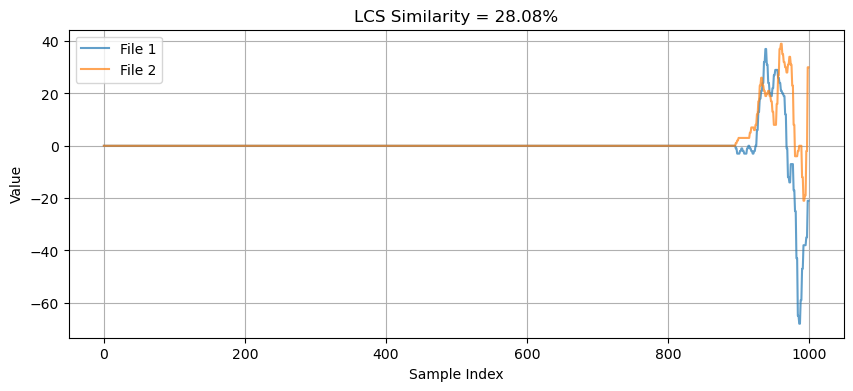

In [11]:
"""
Project Title: Pattern Similarity Detection Using LCS on Audio and Image Data
Author: Sarthak Siddharth Shrungarpawar
Description:
    This project demonstrates how the Longest Common Subsequence (LCS) algorithm
    can be applied to numeric data derived from audio (.wav) and image (.jpeg)
    files to measure similarity — with GUI integration using Tkinter.
"""

import wave
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog, messagebox, ttk


# ---------------------------------------------------------------
# STEP 1: Convert .wav file to text
# ---------------------------------------------------------------
def wav_to_txt(filepath, out_txt):
    try:
        with wave.open(filepath, 'rb') as wav_file:
            n_frames = wav_file.getnframes()
            frames = wav_file.readframes(n_frames)
            samples = np.frombuffer(frames, dtype=np.int16)

        np.savetxt(out_txt, samples, fmt='%d')
        messagebox.showinfo("Success", f"[AUDIO] Saved {len(samples)} samples → {out_txt}")
    except Exception as e:
        messagebox.showerror("Error", f"Error converting WAV: {e}")


# ---------------------------------------------------------------
# STEP 2: Convert .jpeg file to text
# ---------------------------------------------------------------
def jpeg_to_txt(filepath, out_txt):
    try:
        img = Image.open(filepath).convert('L')  # grayscale
        arr = np.array(img).flatten()
        np.savetxt(out_txt, arr, fmt='%d')
        messagebox.showinfo("Success", f"[IMAGE] Saved {arr.size} pixel values → {out_txt}")
    except Exception as e:
        messagebox.showerror("Error", f"Error converting JPEG: {e}")


# ---------------------------------------------------------------
# STEP 3: Read sequence data from text file
# ---------------------------------------------------------------
def read_sequence(filepath, limit=None):
    try:
        with open(filepath, 'r') as f:
            seq = [int(x.strip()) for x in f.readlines()]
        if limit:
            seq = seq[:limit]
        return seq
    except Exception as e:
        messagebox.showerror("Error", f"Error reading {filepath}: {e}")
        return []


# ---------------------------------------------------------------
# STEP 4: LCS Algorithm (Optimized DP version)
# ---------------------------------------------------------------
def lcs_length(seq1, seq2):
    # Space-optimized DP (O(min(m,n)) space)
    if len(seq1) < len(seq2):
        seq1, seq2 = seq2, seq1

    prev = [0] * (len(seq2) + 1)
    curr = [0] * (len(seq2) + 1)

    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            if seq1[i - 1] == seq2[j - 1]:
                curr[j] = prev[j - 1] + 1
            else:
                curr[j] = max(prev[j], curr[j - 1])
        prev, curr = curr, [0] * (len(seq2) + 1)

    return prev[-1]


# ---------------------------------------------------------------
# STEP 5: Compare Two Files using LCS
# ---------------------------------------------------------------
def compare_sequences(file1, file2, sample_limit=5000):
    seq1 = read_sequence(file1, limit=sample_limit)
    seq2 = read_sequence(file2, limit=sample_limit)

    if not seq1 or not seq2:
        return

    lcs_len = lcs_length(seq1, seq2)
    similarity = lcs_len / min(len(seq1), len(seq2)) * 100

    messagebox.showinfo(
        "LCS Similarity Result",
        f"LCS Length: {lcs_len}\n"
        f"Seq1 Length: {len(seq1)}\n"
        f"Seq2 Length: {len(seq2)}\n"
        f"Similarity: {similarity:.2f}%"
    )

    # Visualize first 1000 samples for comparison
    plt.figure(figsize=(10, 4))
    plt.plot(seq1[:1000], label='File 1', alpha=0.7)
    plt.plot(seq2[:1000], label='File 2', alpha=0.7)
    plt.title(f"LCS Similarity = {similarity:.2f}%")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()


# ---------------------------------------------------------------
# GUI Functions
# ---------------------------------------------------------------
def select_wav():
    filepath = filedialog.askopenfilename(filetypes=[("WAV Files", "*.wav")])
    if filepath:
        out = os.path.splitext(filepath)[0] + "_audio.txt"
        wav_to_txt(filepath, out)


def select_jpeg():
    filepath = filedialog.askopenfilename(filetypes=[("JPEG Files", "*.jpeg *.jpg")])
    if filepath:
        out = os.path.splitext(filepath)[0] + "_image.txt"
        jpeg_to_txt(filepath, out)


def compare_txt():
    file1 = filedialog.askopenfilename(title="Select First TXT File", filetypes=[("Text Files", "*.txt")])
    file2 = filedialog.askopenfilename(title="Select Second TXT File", filetypes=[("Text Files", "*.txt")])
    if file1 and file2:
        compare_sequences(file1, file2)


# ---------------------------------------------------------------
# STEP 6: Tkinter GUI
# ---------------------------------------------------------------
def main_gui():
    root = tk.Tk()
    root.title("Pattern Similarity Detection Using LCS")
    root.geometry("520x420")
    root.resizable(False, False)
    root.configure(bg="#F4F6F7")

    title_label = tk.Label(
        root, text="Pattern Similarity Detection Using LCS",
        font=("Helvetica", 14, "bold"), bg="#F4F6F7", fg="#2C3E50"
    )
    title_label.pack(pady=20)

    ttk.Style().configure("TButton", padding=8, font=("Helvetica", 11))

    ttk.Button(root, text="🎵 Convert WAV → TXT", command=select_wav).pack(pady=10)
    ttk.Button(root, text="🖼️ Convert JPEG → TXT", command=select_jpeg).pack(pady=10)
    ttk.Button(root, text="🔍 Compare Two TXT Files", command=compare_txt).pack(pady=10)
    ttk.Button(root, text="❌ Exit", command=root.quit).pack(pady=20)

    footer = tk.Label(
        root, text="Developed by Sarthak Siddharth Shrungarpawar",
        bg="#F4F6F7", fg="#7B7D7D", font=("Arial", 9)
    )
    footer.pack(side="bottom", pady=10)

    root.mainloop()


# ---------------------------------------------------------------
# Run GUI
# ---------------------------------------------------------------
if __name__ == "__main__":
    main_gui()

In [ ]:
"""
Project Title: Pattern Similarity Detection Using LCS on Audio and Image Data
Author: Sarthak Siddharth Shrungarpawar
Description:
    This project demonstrates how the Longest Common Subsequence (LCS) algorithm
    can be applied to numeric data derived from audio (.wav) and image (.jpeg)
    files to measure similarity — with GUI integration using Tkinter and
    embedded waveform visualization.
"""

import wave
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os
import tkinter as tk
from tkinter import filedialog, messagebox, ttk


# ---------------------------------------------------------------
# STEP 1: Convert .wav file to text
# ---------------------------------------------------------------
def wav_to_txt(filepath, out_txt, canvas_area):
    try:
        with wave.open(filepath, 'rb') as wav_file:
            n_frames = wav_file.getnframes()
            frames = wav_file.readframes(n_frames)
            samples = np.frombuffer(frames, dtype=np.int16)

        np.savetxt(out_txt, samples, fmt='%d')
        messagebox.showinfo("Success", f"[AUDIO] Saved {len(samples)} samples → {out_txt}")

        # Display waveform in GUI
        plot_waveform(samples, title=f"WAV File: {os.path.basename(filepath)}", canvas_area=canvas_area)

    except Exception as e:
        messagebox.showerror("Error", f"Error converting WAV: {e}")


# ---------------------------------------------------------------
# STEP 2: Convert .jpeg file to text
# ---------------------------------------------------------------
def jpeg_to_txt(filepath, out_txt, canvas_area):
    try:
        img = Image.open(filepath).convert('L')  # grayscale
        arr = np.array(img).flatten()
        np.savetxt(out_txt, arr, fmt='%d')
        messagebox.showinfo("Success", f"[IMAGE] Saved {arr.size} pixel values → {out_txt}")

        # Display grayscale intensity plot
        plot_waveform(arr[:1000], title=f"JPEG Intensity Preview: {os.path.basename(filepath)}", canvas_area=canvas_area)

    except Exception as e:
        messagebox.showerror("Error", f"Error converting JPEG: {e}")


# ---------------------------------------------------------------
# STEP 3: Read sequence data from text file
# ---------------------------------------------------------------
def read_sequence(filepath, limit=None):
    try:
        with open(filepath, 'r') as f:
            seq = [int(x.strip()) for x in f.readlines()]
        if limit:
            seq = seq[:limit]
        return seq
    except Exception as e:
        messagebox.showerror("Error", f"Error reading {filepath}: {e}")
        return []


# ---------------------------------------------------------------
# STEP 4: LCS Algorithm (Space-optimized)
# ---------------------------------------------------------------
def lcs_length(seq1, seq2):
    if len(seq1) < len(seq2):
        seq1, seq2 = seq2, seq1

    prev = [0] * (len(seq2) + 1)
    curr = [0] * (len(seq2) + 1)

    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            if seq1[i - 1] == seq2[j - 1]:
                curr[j] = prev[j - 1] + 1
            else:
                curr[j] = max(prev[j], curr[j - 1])
        prev, curr = curr, [0] * (len(seq2) + 1)

    return prev[-1]


# ---------------------------------------------------------------
# STEP 5: Compare Two Files using LCS
# ---------------------------------------------------------------
def compare_sequences(file1, file2, canvas_area, sample_limit=5000):
    seq1 = read_sequence(file1, limit=sample_limit)
    seq2 = read_sequence(file2, limit=sample_limit)

    if not seq1 or not seq2:
        return

    lcs_len = lcs_length(seq1, seq2)
    similarity = lcs_len / min(len(seq1), len(seq2)) * 100

    messagebox.showinfo(
        "LCS Similarity Result",
        f"LCS Length: {lcs_len}\n"
        f"Seq1 Length: {len(seq1)}\n"
        f"Seq2 Length: {len(seq2)}\n"
        f"Similarity: {similarity:.2f}%"
    )

    # Show both sequences in embedded graph
    plot_comparison(seq1, seq2, similarity, canvas_area)


# ---------------------------------------------------------------
# STEP 6: Plot Waveform in GUI (Matplotlib Embedded)
# ---------------------------------------------------------------
def plot_waveform(data, title, canvas_area):
    for widget in canvas_area.winfo_children():
        widget.destroy()

    fig, ax = plt.subplots(figsize=(6, 2.5), dpi=100)
    ax.plot(data[:1000], color='blue', alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("Sample Index")
    ax.set_ylabel("Amplitude")
    ax.grid(True)

    canvas = FigureCanvasTkAgg(fig, master=canvas_area)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)


def plot_comparison(seq1, seq2, similarity, canvas_area):
    for widget in canvas_area.winfo_children():
        widget.destroy()

    fig, ax = plt.subplots(figsize=(6, 2.5), dpi=100)
    ax.plot(seq1[:1000], label='File 1', alpha=0.7)
    ax.plot(seq2[:1000], label='File 2', alpha=0.7)
    ax.set_title(f"LCS Similarity = {similarity:.2f}%")
    ax.set_xlabel("Sample Index")
    ax.set_ylabel("Value")
    ax.legend()
    ax.grid(True)

    canvas = FigureCanvasTkAgg(fig, master=canvas_area)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)


# ---------------------------------------------------------------
# STEP 7: GUI Integration
# ---------------------------------------------------------------
def main_gui():
    root = tk.Tk()
    root.title("Pattern Similarity Detection Using LCS")
    root.geometry("720x580")
    root.resizable(False, False)
    root.configure(bg="#F4F6F7")

    # --- Title ---
    title_label = tk.Label(
        root, text="Pattern Similarity Detection Using LCS",
        font=("Helvetica", 15, "bold"), bg="#F4F6F7", fg="#2C3E50"
    )
    title_label.pack(pady=10)

    # --- Buttons Frame ---
    button_frame = tk.Frame(root, bg="#F4F6F7")
    button_frame.pack(pady=10)

    ttk.Style().configure("TButton", padding=8, font=("Helvetica", 11))

    # Placeholder frame for waveform plot
    canvas_frame = tk.LabelFrame(root, text="Visualization", bg="#F4F6F7", font=("Helvetica", 10, "bold"), padx=10, pady=5)
    canvas_frame.pack(fill=tk.BOTH, expand=True, padx=10, pady=10)

    ttk.Button(button_frame, text="🎵 Convert WAV → TXT", command=lambda: select_wav(canvas_frame)).grid(row=0, column=0, padx=10, pady=5)
    ttk.Button(button_frame, text="🖼️ Convert JPEG → TXT", command=lambda: select_jpeg(canvas_frame)).grid(row=0, column=1, padx=10, pady=5)
    ttk.Button(button_frame, text="🔍 Compare Two TXT Files", command=lambda: compare_txt(canvas_frame)).grid(row=0, column=2, padx=10, pady=5)
    ttk.Button(button_frame, text="❌ Exit", command=root.quit).grid(row=0, column=3, padx=10, pady=5)

    footer = tk.Label(
        root, text="Developed by Sarthak Siddharth Shrungarpawar",
        bg="#F4F6F7", fg="#7B7D7D", font=("Arial", 9)
    )
    footer.pack(side="bottom", pady=5)

    root.mainloop()


# ---------------------------------------------------------------
# STEP 8: File selection helpers
# ---------------------------------------------------------------
def select_wav(canvas_area):
    filepath = filedialog.askopenfilename(filetypes=[("WAV Files", "*.wav")])
    if filepath:
        out = os.path.splitext(filepath)[0] + "_audio.txt"
        wav_to_txt(filepath, out, canvas_area)


def select_jpeg(canvas_area):
    filepath = filedialog.askopenfilename(filetypes=[("JPEG Files", "*.jpeg *.jpg")])
    if filepath:
        out = os.path.splitext(filepath)[0] + "_image.txt"
        jpeg_to_txt(filepath, out, canvas_area)


def compare_txt(canvas_area):
    file1 = filedialog.askopenfilename(title="Select First TXT File", filetypes=[("Text Files", "*.txt")])
    file2 = filedialog.askopenfilename(title="Select Second TXT File", filetypes=[("Text Files", "*.txt")])
    if file1 and file2:
        compare_sequences(file1, file2, canvas_area)


# ---------------------------------------------------------------
# Run GUI
# ---------------------------------------------------------------
if __name__ == "__main__":
    main_gui()